<a 
href="https://colab.research.google.com/github/adilo231/Python-for-machine-learning/blob/main/Exercices Global/SpaceshipTitanicClassification.ipynb" 
target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries 

In [1]:

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px  # for visualization
import warnings
warnings.filterwarnings("ignore")


# Information about Data set 

**PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

**HomePlane**t - The planet the passenger departed from, typically their planet of permanent residence.

**CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

**Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

**Destination** - The planet the passenger will be debarking to.

**Age** - The age of the passenger.

**VIP** - Whether the passenger has paid for special VIP service during the voyage.

**RoomService**, **FoodCourt**, **ShoppingMall**, **Spa**, **VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

**Name**- The first and last names of the passenger.

**Transported**- Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.




# Loading and preview of our dataset

In [86]:
titanic = pd.read_csv("Spacetrain.csv")
titanic_test = pd.read_csv("Spacetest.csv")
titanic.head(10)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [3]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Cardinalaity In our columns(1)

<AxesSubplot:title={'center':'Cardinality in our columns'}>

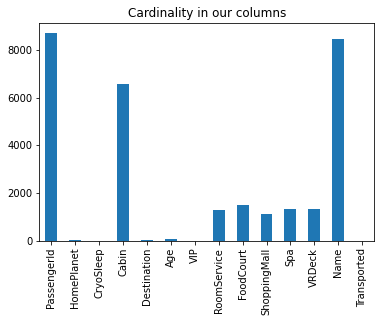

In [4]:
titanic.nunique().plot.bar(title="Cardinality in our columns")


## Duplicates

In [7]:
print(
    f'Duplicates in train set: {titanic.duplicated().sum()}, ({np.round(100*titanic.duplicated().sum()/len(titanic),1)}%)')
print('')
print(
    f'Duplicates in test set: {titanic_test.duplicated().sum()}, ({np.round(100*titanic_test.duplicated().sum()/len(titanic_test),1)}%)')


Duplicates in train set: 0, (0.0%)

Duplicates in test set: 0, (0.0%)


## Observations
* 8693 rows(obervations) and 14 columns(13 features + 1 target varible)
* data types -int,float,obj
* Notice - we have some feature which have multiple informations in one column
  and this are also have the greatest cardinality
* we also some missing values
* we haveBinary columns- Transported,CryoSleep,VIP
* high cardinality in columns

# Handling Mixed Varibles

### Our passengerId has two information in 1 column we need to separate them

In [14]:
# here we are seperation passenger group info and the no. passenger has in that group.
# we created dataframe with two columns and assigned the values in orignal dataframe
titanic[["Passenger_group", "Passennger_no._in_group"]
        ] = titanic["PassengerId"].str.split("_", expand=True)

# dropinng passengerId as we have seperated the information in two column we dont need it..
titanic.drop(columns=["PassengerId"], inplace=True)
titanic.head()


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Passenger_group,Passennger_no._in_group
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [7]:
# logic is same for below features as well


### In cabin column we have three information in one column. lets seperate them

In [15]:
titanic[["Cabin_deck", "Cabin_no.", "Cabin_side"]
        ] = titanic["Cabin"].str.split("/", expand=True)
titanic.drop(columns=["Cabin", "Cabin_no."], inplace=True)

titanic.head()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Passenger_group,Passennger_no._in_group,Cabin_deck,Cabin_side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,S


###  Name column also has two information in it

In [9]:
titanic[["firstname", "last_name"]
        ] = titanic["Name"].str.split(" ", expand=True)
titanic.drop(columns=["Name"], inplace=True)
titanic.head()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Passenger_group,Passennger_no._in_group,Cabin_deck,Cabin_no.,Cabin_side,firstname,last_name
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,B,0,P,Maham,Ofracculy
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01,F,0,S,Juanna,Vines
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,A,0,S,Altark,Susent
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,02,A,0,S,Solam,Susent
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,01,F,1,S,Willy,Santantines


In [10]:
titanic.nunique()  # unique values in columns


HomePlanet                    3
CryoSleep                     2
Destination                   3
Age                          80
VIP                           2
RoomService                1273
FoodCourt                  1507
ShoppingMall               1115
Spa                        1327
VRDeck                     1306
Name                       8473
Transported                   2
Passenger_group            6217
Passennger_no._in_group       8
Cabin_deck                    8
Cabin_no.                  1817
Cabin_side                    2
dtype: int64

# Cardinalaity In our columns(2)

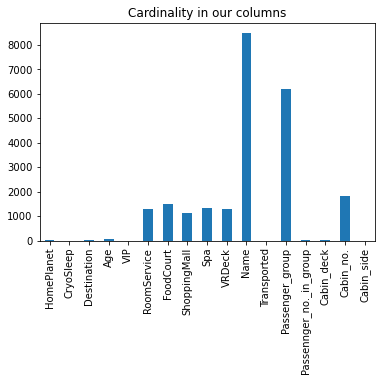

In [11]:
titanic.nunique().plot.bar(title="Cardinality in our columns")


## Observation
 * Notice - how the cardinality has decreased in some columns
 * our columns has been change . we can better work with this ones

# Quantifying missing values

In [12]:


missing = (titanic.isnull().mean().sort_values(
    ascending=False)*100).reset_index()
missing.rename(columns={0: "Average"}, inplace=True)
missing.head()

fig = px.histogram(missing, x="Average", y="index", title="<b>% of Missing values",
                   color="index", labels={"Average": "%age of missing values", "index": "Column Names"})
fig.update_layout(
    font_color="white",
    font_size=12,
    title_font_color="cyan",
    legend_title_font_color="white",
    legend_title_font_size=20,
    template="plotly_dark",
    title_font_size=30

)
fig.update_layout(xaxis_title="<b>Amount in %age", xaxis_title_font_size=20,
                  yaxis_title="<b>Column-Name", yaxis_title_font_size=20, title_x=0.5)
fig.show()
fig = px.imshow(titanic.isnull().T, color_continuous_scale=px.colors.sequential.Electric,
                title="<b>Missing values in our data",)
fig.update_layout(template="plotly_dark", title_font_size=30, title_x=0.5)


fig.show()


# Observation
* **Not a lot of data is missing in particular features**
* **all features has missing values in the range 2-2.5%** (except Passenger group and no. in group -no missing values)
* **our target feature has no missing values int it**

In [13]:
# lets check what happens when we drop missing values

(titanic.dropna().shape[0]/titanic.shape[0]) * 100

# so after dropping missing values we are left with 76% data
# thats lot of data to drop
# we will not drop instead i thnik we should impute those values


75.99217761417232

# Handling binary features (Transported,Cryosleep,VIP)

In [14]:
titanic["Transported"] = np.where(
    titanic["Transported"] == True, 1, 0)  # replacing true-1,false-0


# ignore them for now
# titanic["CryoSleep"]=np.where(titanic["CryoSleep"]==True,1,np.where(titanic["CryoSleep"]==False,0,titanic["CryoSleep"])) # replacing true-1,false-0

# titanic["VIP"]=np.where(titanic["VIP"]==True,1,np.where(titanic["VIP"]==False,0,titanic["VIP"])) # replacing true-1,false-0 and nan


In [15]:
titanic.info()
# transported data type has change from bool to Obj


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   HomePlanet               8492 non-null   object 
 1   CryoSleep                8476 non-null   object 
 2   Destination              8511 non-null   object 
 3   Age                      8514 non-null   float64
 4   VIP                      8490 non-null   object 
 5   RoomService              8512 non-null   float64
 6   FoodCourt                8510 non-null   float64
 7   ShoppingMall             8485 non-null   float64
 8   Spa                      8510 non-null   float64
 9   VRDeck                   8505 non-null   float64
 10  Transported              8693 non-null   int64  
 11  Passenger_group          8693 non-null   object 
 12  Passennger_no._in_group  8693 non-null   object 
 13  Cabin_deck               8494 non-null   object 
 14  Cabin_no.               

## Now take a look

In [16]:
titanic.head()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Passenger_group,Passennger_no._in_group,Cabin_deck,Cabin_no.,Cabin_side,firstname,last_name
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0001,01,B,0,P,Maham,Ofracculy
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,0002,01,F,0,S,Juanna,Vines
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,0003,01,A,0,S,Altark,Susent
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,0003,02,A,0,S,Solam,Susent
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,0004,01,F,1,S,Willy,Santantines


# Identifying the Data types of features 

## (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck )-Numerical
### Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities

In [6]:
numerical_cols = ["Age", "RoomService", "Spa",
                  "VRDeck", "ShoppingMall", "FoodCourt"]
numerical_cols


['Age', 'RoomService', 'Spa', 'VRDeck', 'ShoppingMall', 'FoodCourt']

In [16]:
categorical_cols = [
    feature for feature in titanic.columns if feature not in numerical_cols]
categorical_cols


['HomePlanet',
 'CryoSleep',
 'Destination',
 'VIP',
 'Name',
 'Transported',
 'Passenger_group',
 'Passennger_no._in_group',
 'Cabin_deck',
 'Cabin_no.',
 'Cabin_side']

# Distribution Of Categorical features

In [19]:
for feature in categorical_cols:
    if feature not in['Passenger_group','firstname','last_name','Cabin_no.']:

        df=titanic[feature].value_counts().reset_index()
        
        fig=px.pie(df,values=df.columns[1],names=df.columns[0],
                   labels={"index":"<b>"+feature,feature:"Count"},
                  color_discrete_sequence=px.colors.qualitative.Pastel)

        fig.update_layout(title="<b>"+feature, title_font_size=30,
                         font_size=20,
                         title_x=0.5,legend_bordercolor="#000",legend_borderwidth=2,
                         hoverlabel_font_size=20)
        fig.update_traces(marker=dict( line=dict(color='#000000', width=2)))              
        fig.show()

    

# Observation
 * **Homeplanet**- most people was from **Earth** Followed by **Europa**, **Mars**
 * **Cryosleep** - most people was not in **CryoSleep**
 * **Destination** - mostly people was debarking to **TRAPPIST-1e** Followed by **Canri e**, **PSO** 
 * **Vip** - frequency of **non VIP** people quite large Compared **VIP** people 
 * **Transported** - no. of non transported is greater than transported people 
 * **No.inGroup** - Majority of the were travellling alone in their group
 
 * **Cabin Name**- majority of people were in G and F cabin . 
 * **Cabin side**-- NO of people on both sides is almost equal

# Categoical features vs Target

In [20]:
for feature in categorical_cols:
    if feature not in ['Passenger_group', 'firstname', 'last_name', 'Cabin_no.', "Transported"]:
        fig = px.histogram(titanic, x=feature, facet_col="Transported", color="Transported",
                           color_discrete_sequence=px.colors.qualitative.Alphabet_r)
        fig.update_layout(title="<b>"+feature+" vs Transported", title_font_size=30,
                          font_size=20,
                          title_x=0.5,
                          hoverlabel_font_size=20, template="plotly_dark")

        fig.show()


# Observation 
* **Homeplanet** - **Europa amd marks** has more transported people than **Earth** even  though earth has more no. of people                        transported  but it has lower transport %
* **Cryosleep**  **cryosleep people** shows better transport percentage than non cryosleep people(so if you are in cryosleep                                you are most like be  transported)
* **Destination**- **Trappist-1e** has greate no of transported people but if we see who has better %of tranported people I will                                      sayits **55 cancrie** 
* **Vip**- **Non Vip person** has Equal chance of being on either side (tranported or non transported) but **Vip** has more                                     than half  the chance that they will not transported ..
* **Cabin** - Deck **B** And **C** has more chance of getting transported . **E** has more chance of getting Not tranported.
* **Cabin Side** - equal chance on both cabin being on either of side 

# Distribution in our Numerical Features

In [21]:
for feature in numerical_cols:
    fig = px.violin(titanic, x=feature, color="Transported",
                    title="<b>"+feature+" Distribution", template="plotly_dark")
    fig.update_layout(hovermode='x', title_font_size=30)
    fig.update_layout(
        title_font_color="#ffff00",
        template="plotly_dark",
        title_font_size=30,
        hoverlabel_font_size=20,
        title_x=0.5
    )
    fig.show()

    fig = px.histogram(titanic, x=feature, title="<b>"+feature +
                       "Vs Transported", color="Transported", template="plotly_dark")
    fig.update_layout(hovermode='x', title_font_size=30)
    fig.update_layout(
        title_font_color="#ffff00",
        template="plotly_dark",
        title_font_size=30,
        hoverlabel_font_size=20,
        title_x=0.5)

    fig.show()


# Obervation
* **skewed data(right)**
* **all of them have outliers**
*  **Age show similar distribution except when age is b/w 0-4 where people were transported very much large than no    transported** why this age is zero??
* 

# Correlation matrix

In [22]:
px.imshow(titanic.corr().round(3), text_auto=True)


In [23]:
px.scatter_matrix(titanic[numerical_cols], height=800)


In [16]:
titanic.head()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Passenger_group,Passennger_no._in_group,Cabin_deck,Cabin_side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,S


In [139]:
df = titanic.copy()
df = df.drop('Name', 1)
df.columns


Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported',
       'Passenger_group', 'Passennger_no._in_group', 'Cabin_deck',
       'Cabin_side'],
      dtype='object')

In [140]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.dropna(0, inplace=True)
df.isna().sum()
df.head()


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Passenger_group,Passennger_no._in_group,Cabin_deck,Cabin_side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0001,01,B,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,0002,01,F,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,0003,01,A,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,0003,02,A,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,0004,01,F,S


In [141]:
y = df.Transported
X = df.drop('Transported', 1)
numerical_cols = ["Age", "RoomService", "Spa",
                  "VRDeck", "ShoppingMall", "FoodCourt"]
numerical_cols
categorical_cols = [
    feature for feature in X.columns if feature not in numerical_cols]
categorical_cols
print(X.shape[1], len(numerical_cols), len(categorical_cols))


14 6 8


In [142]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler,RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split


numerical_pipline = make_pipeline(SimpleImputer(strategy='mean'), RobustScaler())
categorical_pipline = make_pipeline(SimpleImputer(
    strategy='most_frequent'), OrdinalEncoder())
preprocessor = make_column_transformer((numerical_pipline, numerical_cols),
                                       (categorical_pipline, categorical_cols))

X = pd.DataFrame(preprocessor.fit_transform(X), columns=['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
                                                         'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
                                                         'Passenger_group', 'Passennger_no._in_group', 'Cabin_deck',
                                                         'Cabin_side'])


In [143]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions x_train dataset:  (5533, 14)
Number transactions y_train dataset:  (5533,)
Number transactions x_test dataset:  (1384, 14)
Number transactions y_test dataset:  (1384,)


In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score


In [145]:
from tqdm import tqdm
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['SVM', SVC(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric='error')])

lst_1 = []

for m in tqdm(range(len(models))):
    lst_2 = []
    model = models[m][1]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)  # Confusion Matrix
    accuracies = cross_val_score(
        estimator=model, X=x_train, y=y_train, cv=10)  # K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  # ROC AUC Score
    precision = precision_score(y_test, y_pred)  # Precision Score
    recall = recall_score(y_test, y_pred)  # Recall Score
    f1 = f1_score(y_test, y_pred)  # F1 Score

    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)


100%|██████████| 8/8 [00:49<00:00,  6.14s/it]


In [146]:
df = pd.DataFrame(lst_1, columns=['Model', 'Accuracy', 'K-Fold Mean Accuracy',
                                  'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])
df.sort_values(by=['Accuracy', 'K-Fold Mean Accuracy'],
               inplace=True, ascending=False)
df


,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
7,XGBoost,79.479769,80.390943,1.951089,0.795680,0.821694,0.771269,0.795683
6,Random Forest,79.190751,80.191734,2.185969,0.793413,0.830508,0.751743,0.789165
0,Logistic Regreesion,78.395954,78.981009,1.726672,0.781665,0.763224,0.845188,0.802118
5,Decision Tree,73.699422,75.547979,2.290969,0.737539,0.758419,0.722455,0.740000
4,BernoulliNB,72.109827,73.793910,1.508094,0.722982,0.762282,0.670851,0.713650
3,GaussianNB,71.748555,70.991703,1.176174,0.710138,0.665650,0.913529,0.770135
2,KNeighbors,67.485549,66.925402,1.691090,0.670092,0.651189,0.801953,0.718750
1,SVM,55.708092,54.617609,1.758700,0.558881,0.583067,0.509066,0.543559


In [32]:
from sklearn.model_selection import GridSearchCV

grid_models = [(LogisticRegression(), [{'C': [0.25, 0.5, 0.75, 1], 'random_state':[0]}]),
               (KNeighborsClassifier(), [{'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'metric': [
                'euclidean', 'manhattan', 'chebyshev', 'minkowski']}]),

               (GaussianNB(), [{'var_smoothing': [1e-09]}]),
               (BernoulliNB(), [{'alpha': [0.25, 0.5, 1]}]),
               (DecisionTreeClassifier(), [
                {'criterion': ['gini', 'entropy'], 'random_state':[0]}]),
               (RandomForestClassifier(), [{'n_estimators': [
                100, 150, 200], 'criterion':['gini', 'entropy'], 'random_state':[0]}]),
               #(SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear', 'rbf'],'random_state':[0]}]),
               (XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}])]


In [33]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])

models.append(['KNeighbors', KNeighborsClassifier()])
models.append(['GaussianNB', GaussianNB()])
models.append(['BernoulliNB', BernoulliNB()])
models.append(['Decision Tree', DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['XGBoost', XGBClassifier(eval_metric='error')])


In [34]:
from sklearn.model_selection import ShuffleSplit, StratifiedKFold, LeaveOneOut
lst_1 = []
modeles = []

k = 0
for i, j in tqdm(grid_models):
    lst_2 = []
    cv = 10
    grid = GridSearchCV(estimator=i, param_grid=j, cv=cv)
    grid.fit(x_train, y_train)
    model = grid.best_estimator_
    y_pred = model.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)  # Confusion Matrix
    accuracies = cross_val_score(
        estimator=model, X=x_train, y=y_train, cv=cv)  # K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  # ROC AUC Score
    precision = precision_score(y_test, y_pred)  # Precision Score
    recall = recall_score(y_test, y_pred)  # Recall Score
    f1 = f1_score(y_test, y_pred)  # F1 Score

    modeles.append(model)
    lst_2.append(models[k][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)
    print(lst_2)
    k += 1


 14%|█▍        | 1/7 [00:04<00:29,  4.84s/it]

['Logistic Regreesion', 77.3121387283237, 79.41484257185945, 1.7653144411382746, 0.7725635090404588, 0.7771664374140302, 0.7880055788005579, 0.7825484764542936]


 29%|██▊       | 2/7 [00:15<00:32,  6.59s/it]

['KNeighbors', 58.52601156069365, 60.63614286367108, 1.1372091720578217, 0.584770376318117, 0.6, 0.5983263598326359, 0.5991620111731844]


 43%|████▎     | 3/7 [00:15<00:18,  4.69s/it]

['GaussianNB', 71.67630057803468, 70.90131935422801, 1.186947891563346, 0.7092834335970091, 0.6643073811931244, 0.9163179916317992, 0.7702227432590856]


 57%|█████▋    | 4/7 [00:16<00:10,  3.44s/it]

['BernoulliNB', 73.98843930635837, 75.67315789817275, 1.5635542424231215, 0.7417922837744307, 0.7828843106180665, 0.6889818688981869, 0.7329376854599406]


 71%|███████▏  | 5/7 [00:18<00:06,  3.04s/it]

['Decision Tree', 74.0606936416185, 75.60219609481594, 2.3122816760306715, 0.7412350310200547, 0.763235294117647, 0.7238493723849372, 0.7430207587687903]


 86%|████████▌ | 6/7 [01:41<00:27, 27.06s/it]

['Random Forest', 78.90173410404624, 80.57138287385511, 2.3468464998497285, 0.790623516693536, 0.8294573643410853, 0.7461645746164575, 0.7856093979441997]


100%|██████████| 7/7 [02:08<00:00, 18.30s/it]

['XGBoost', 79.6965317919075, 80.77052637076399, 1.4715504513558382, 0.7975625158132231, 0.8187134502923976, 0.7810320781032078, 0.7994289793004996]


In [35]:
df = pd.DataFrame(lst_1, columns=['Model', 'Accuracy', 'K-Fold Mean Accuracy',
                                  'Std. Deviation', 'ROC AUC', 'Precision', 'Recall', 'F1'])
df.sort_values(by=['Accuracy', 'K-Fold Mean Accuracy'],
               inplace=True, ascending=False)
df


,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
6,XGBoost,79.696532,80.770526,1.471550,0.797563,0.818713,0.781032,0.799429
5,Random Forest,78.901734,80.571383,2.346846,0.790624,0.829457,0.746165,0.785609
0,Logistic Regreesion,77.312139,79.414843,1.765314,0.772564,0.777166,0.788006,0.782548
4,Decision Tree,74.060694,75.602196,2.312282,0.741235,0.763235,0.723849,0.743021
3,BernoulliNB,73.988439,75.673158,1.563554,0.741792,0.782884,0.688982,0.732938
2,GaussianNB,71.676301,70.901319,1.186948,0.709283,0.664307,0.916318,0.770223
1,KNeighbors,58.526012,60.636143,1.137209,0.584770,0.600000,0.598326,0.599162


In [37]:
modeles[5]


RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [147]:
lst_2 = []
cv = 10
params = {'learning_rate': [0.01, 0.025, 0.05,
                            0.075, 0.1, 0.2, 0.3], 'eval_metric': ['error']}
grid = GridSearchCV(estimator=XGBClassifier(), param_grid=params, cv=cv)
grid.fit(x_train, y_train)
model = grid.best_estimator_
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)  # Confusion Matrix
accuracies = cross_val_score(
    estimator=model, X=x_train, y=y_train, cv=cv)  # K-Fold Validation
roc = roc_auc_score(y_test, y_pred)  # ROC AUC Score
precision = precision_score(y_test, y_pred)  # Precision Score
recall = recall_score(y_test, y_pred)  # Recall Score
f1 = f1_score(y_test, y_pred)  # F1 Score

lst_2.append('XGBClassifier')
lst_2.append((accuracy_score(y_test, y_pred))*100)
lst_2.append(accuracies.mean()*100)
lst_2.append(accuracies.std()*100)
lst_2.append(roc)
lst_2.append(precision)
lst_2.append(recall)
lst_2.append(f1)
print(lst_2)


['XGBClassifier', 79.6965317919075, 80.78860955340413, 1.4997003374980435, 0.7975625158132231, 0.8187134502923976, 0.7810320781032078, 0.7994289793004996]


In [39]:
lst_2 = []
cv = 10
params = {'n_estimators': [50, 100, 150, 200, 250, 300],
          'criterion': ['gini', 'entropy'], 'random_state': [0]}
grid = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=params, cv=cv)
grid.fit(x_train, y_train)
model = grid.best_estimator_
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)  # Confusion Matrix
accuracies = cross_val_score(
    estimator=model, X=x_train, y=y_train, cv=cv)  # K-Fold Validation
roc = roc_auc_score(y_test, y_pred)  # ROC AUC Score
precision = precision_score(y_test, y_pred)  # Precision Score
recall = recall_score(y_test, y_pred)  # Recall Score
f1 = f1_score(y_test, y_pred)  # F1 Score

lst_2.append('RandomForestClassifier')
lst_2.append((accuracy_score(y_test, y_pred))*100)
lst_2.append(accuracies.mean()*100)
lst_2.append(accuracies.std()*100)
lst_2.append(roc)
lst_2.append(precision)
lst_2.append(recall)
lst_2.append(f1)
print(lst_2)


['RandomForestClassifier', 78.90173410404624, 80.57138287385511, 2.3468464998497285, 0.790623516693536, 0.8294573643410853, 0.7461645746164575, 0.7856093979441997]


In [40]:
grid.best_estimator_


RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

,Model,Accuracy,K-Fold Mean Accuracy,Std. Deviation,ROC AUC,Precision,Recall,F1
6,XGBoost,79.696532,80.770526,1.471550,0.797563,0.818713,0.781032,0.799429
5,Random Forest,78.901734,80.571383,2.346846,0.790624,0.829457,0.746165,0.785609
0,Logistic Regreesion,77.312139,79.414843,1.765314,0.772564,0.777166,0.788006,0.782548
4,Decision Tree,74.060694,75.602196,2.312282,0.741235,0.763235,0.723849,0.743021
3,BernoulliNB,73.988439,75.673158,1.563554,0.741792,0.782884,0.688982,0.732938
2,GaussianNB,71.676301,70.901319,1.186948,0.709283,0.664307,0.916318,0.770223
1,KNeighbors,58.526012,60.636143,1.137209,0.584770,0.600000,0.598326,0.599162


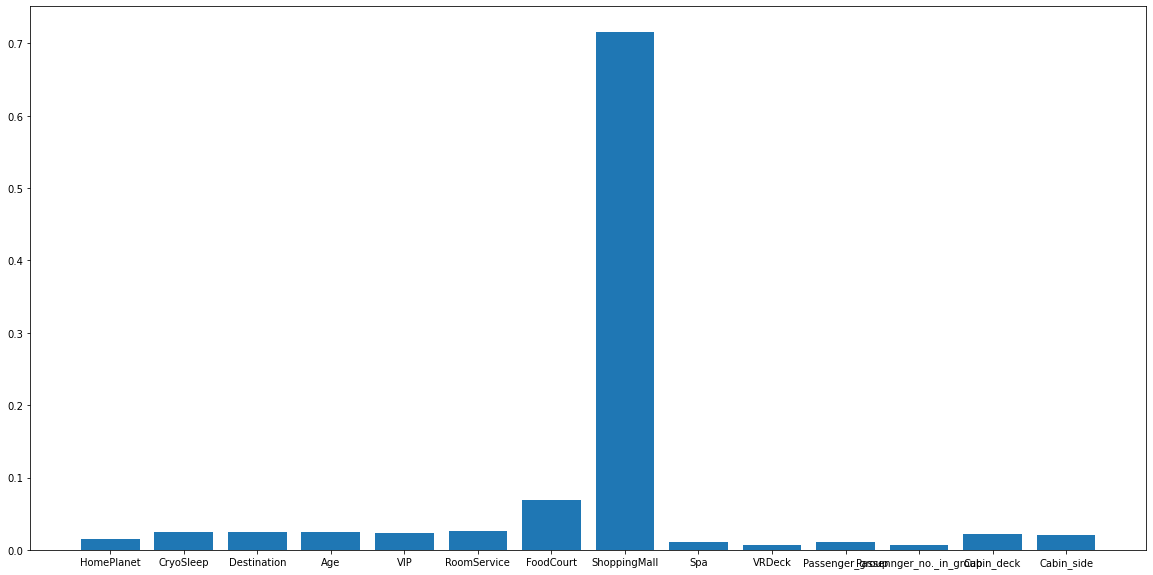

In [57]:
import matplotlib.pylab as plt
plt.figure(figsize=(20, 10))
plt.bar(X.columns, grid.best_estimator_.feature_importances_)


In [3]:
titanic.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [170]:
# here we are seperation passenger group info and the no. passenger has in that group.
# we created dataframe with two columns and assigned the values in orignal dataframe
titanic[["Passenger_group", "Passennger_no._in_group"]
        ] = titanic["PassengerId"].str.split("_", expand=True)

# dropinng passengerId as we have seperated the information in two column we dont need it..
titanic.drop(columns=["PassengerId"], inplace=True)


titanic["Transported"] = np.where(
    titanic["Transported"] == True, 1, 0) 

titanic[["Cabin_deck", "Cabin_no.", "Cabin_side"]
        ] = titanic["Cabin"].str.split("/", expand=True)
titanic.drop(columns=["Cabin", "Cabin_no."], inplace=True)

titanic.head()


KeyError: 'PassengerId'

In [16]:
titanic['Passennger_no._in_group'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08'], dtype=object)

In [235]:
df = titanic.copy()
df=df.drop(['Name','Passenger_group'], 1)
df.dropna(0,inplace=True)
y = df.Transported
X = df.drop(['Transported'], 1)
numerical_cols = ["Age", "RoomService", "ShoppingMall","Spa","VRDeck", "FoodCourt"]
numerical_cols
categorical_cols = [
    feature for feature in X.columns if feature not in numerical_cols]
categorical_cols

print(X.shape,df.shape)


(6764, 13) (6764, 14)


In [236]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler,RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

numerical_pipline = make_pipeline(SimpleImputer(strategy='median'), RobustScaler())
categorical_pipline = make_pipeline(SimpleImputer(
    strategy='most_frequent'), OneHotEncoder())
preprocessor = make_column_transformer((numerical_pipline, numerical_cols),
                                       (categorical_pipline, categorical_cols))

preprocessor = make_column_transformer((numerical_pipline, numerical_cols),
                                       (categorical_pipline, categorical_cols))
#X=pd.DataFrame(preprocessor.fit_transform(X),columns=X.columns)
X=preprocessor.fit_transform(X)
X.shape

(6764, 34)

In [237]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)
print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (5073, 34)
Number transactions y_train dataset:  (5073,)
Number transactions x_test dataset:  (1691, 34)
Number transactions y_test dataset:  (1691,)


In [238]:
from sklearn.model_selection import GridSearchCV
lst_2 = []
cv = 10
params = {'learning_rate': [0.01, 0.025, 0.05,
                            0.075, 0.1, 0.2, 0.3], 'eval_metric': ['error']}
grid = GridSearchCV(estimator=XGBClassifier(), param_grid=params, cv=cv)
grid.fit(x_train, y_train)
model = grid.best_estimator_
y_pred = model.predict(x_test)

cm = confusion_matrix(y_test, y_pred)  # Confusion Matrix
accuracies = cross_val_score(
    estimator=model, X=x_train, y=y_train, cv=cv)  # K-Fold Validation
roc = roc_auc_score(y_test, y_pred)  # ROC AUC Score
precision = precision_score(y_test, y_pred)  # Precision Score
recall = recall_score(y_test, y_pred)  # Recall Score
f1 = f1_score(y_test, y_pred)  # F1 Score

lst_2.append('XGBClassifier')
lst_2.append((accuracy_score(y_test, y_pred))*100)
lst_2.append(accuracies.mean()*100)
lst_2.append(accuracies.std()*100)
lst_2.append(roc)
lst_2.append(precision)
lst_2.append(recall)
lst_2.append(f1)
print(lst_2)

['XGBClassifier', 81.785925487877, 80.50447281367936, 1.2690237703812723, 0.8177219298319245, 0.8123569794050344, 0.8313817330210773, 0.8217592592592593]


In [197]:
import matplotlib.pylab as plt
plt.figure(figsize=(20, 10))
plt.bar(X.columns, grid.best_estimator_.feature_importances_)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

<Figure size 1440x720 with 0 Axes>

In [30]:
grid.best_estimator_.feature_importances_

array([0.00792437, 0.03052021, 0.01935994, 0.02739595, 0.03005401,
       0.02116686, 0.11450686, 0.02523531, 0.01119096, 0.56835866,
       0.        , 0.00762768, 0.00534607, 0.00803529, 0.00310496,
       0.        , 0.00502561, 0.00379315, 0.00377313, 0.00459338,
       0.00844313, 0.        , 0.        , 0.        , 0.00536033,
       0.01276493, 0.01239044, 0.00434746, 0.02950834, 0.00830164,
       0.01015487, 0.        , 0.01171654, 0.        ], dtype=float32)

In [202]:
data = pd.read_csv("Spacetest.csv")
titanic_test = data.copy()
# here we are seperation passenger group info and the no. passenger has in that group.
# we created dataframe with two columns and assigned the values in orignal dataframe
titanic_test[["Passenger_group", "Passennger_no._in_group"]
        ] = titanic_test["PassengerId"].str.split("_", expand=True)

# dropinng passengerId as we have seperated the information in two column we dont need it..
titanic_test.drop(columns=["PassengerId"], inplace=True)



titanic_test[["Cabin_deck", "Cabin_no.", "Cabin_side"]
        ] = titanic_test["Cabin"].str.split("/", expand=True)
titanic_test.drop(columns=["Cabin", "Cabin_no."], inplace=True)

data.shape

(4277, 13)

In [240]:

df = titanic_test.copy()

X = df.drop(['Name','Passenger_group'], 1)
numerical_cols = ["Age", "RoomService", "ShoppingMall","Spa", "VRDeck", "FoodCourt"]
numerical_cols
categorical_cols = [
    feature for feature in X.columns if feature not in numerical_cols]
categorical_cols
print(X.shape[1], len(numerical_cols), len(categorical_cols))
X=preprocessor.fit_transform(X)




13 6 7


In [149]:
X.shape


(4277, 14)

In [241]:
y_pred = model.predict(X)
y_pred.astype("bool")

array([ True, False,  True, ...,  True,  True,  True])

In [159]:
y_pred[y_pred[:]==1]=True
y_pred[y_pred[:]==0]=False

In [151]:
model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [242]:

sub = {'PassengerId': data.PassengerId,'Transported': y_pred }
sub = pd.DataFrame(data=sub)

sub["Transported"] = np.where(
    sub["Transported"] == 1, True, False)

In [243]:
sub.to_csv('submissionSpace2.csv', index = False)